### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [2]:
df = pd.read_csv("NASA data for ANN & SVM.csv")
df[:5]

,time and date,air temperature,surface humidity,radiance intensity,surface incomming short wave flux,total column ozone,total precipitateable water vapours,wind speed
0,8/1/2019 0:00,20.733210,0.015783,336.418793,2.65332,269.776154,19.257727,6.649365
1,8/1/2019 1:00,20.610926,0.015502,333.328033,107.12500,268.784729,18.675245,6.926465
2,8/1/2019 2:00,20.968317,0.015116,330.606750,320.00000,268.444275,18.060242,7.402035
3,8/1/2019 3:00,23.868128,0.012997,335.808411,545.50000,269.155518,17.486549,7.386476
4,8/1/2019 4:00,26.353357,0.010358,343.027130,747.00000,270.530609,17.188797,7.045732


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13176 entries, 0 to 13175
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   time and date                        13176 non-null  object 
 1   air temperature                      13176 non-null  float64
 2   surface humidity                     13176 non-null  float64
 3   radiance intensity                   13176 non-null  float64
 4   surface incomming short wave flux    13176 non-null  float64
 5   total column ozone                   13176 non-null  float64
 6   total precipitateable water vapours  13176 non-null  float64
 7   wind speed                           13176 non-null  float64
dtypes: float64(7), object(1)
memory usage: 823.6+ KB


In [31]:
df.describe()

,air temperature,surface humidity,radiance intensity,surface incomming short wave flux,total column ozone,total precipitateable water vapours,wind speed
count,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000
mean,12.031988,0.004905,262.223297,270.657571,276.117049,8.002597,5.369408
std,9.112877,0.003472,48.902828,350.722496,18.891512,5.993243,2.226993
min,-9.843390,0.000498,149.974533,0.000000,227.644287,0.474742,0.680669
25%,4.677850,0.002298,223.358696,0.000000,263.918030,3.541818,3.715424
50%,11.789804,0.003910,261.602936,11.839844,272.287216,6.491242,5.137253
75%,19.466761,0.006444,298.003952,569.250000,286.358642,10.822983,6.747079
max,31.157282,0.017878,391.483673,1125.500000,369.622864,41.036938,16.384342


# Data Analysis

### Distribution of Air Temperature

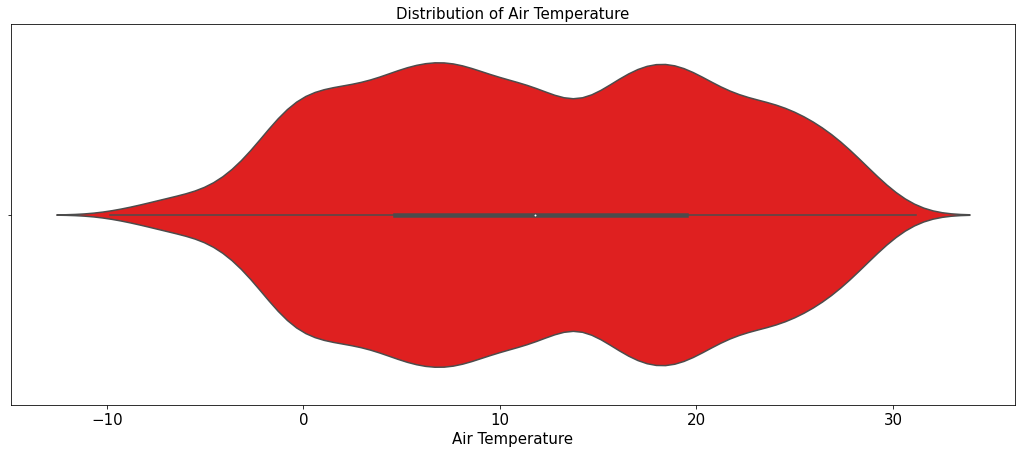

In [32]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "air temperature", data = df, color = "red")
plt.title("Distribution of Air Temperature", size = 15)
plt.xlabel("Air Temperature", size = 15)
plt.xticks(size = 15)
plt.show()

### Distrinution of Surface Humidity

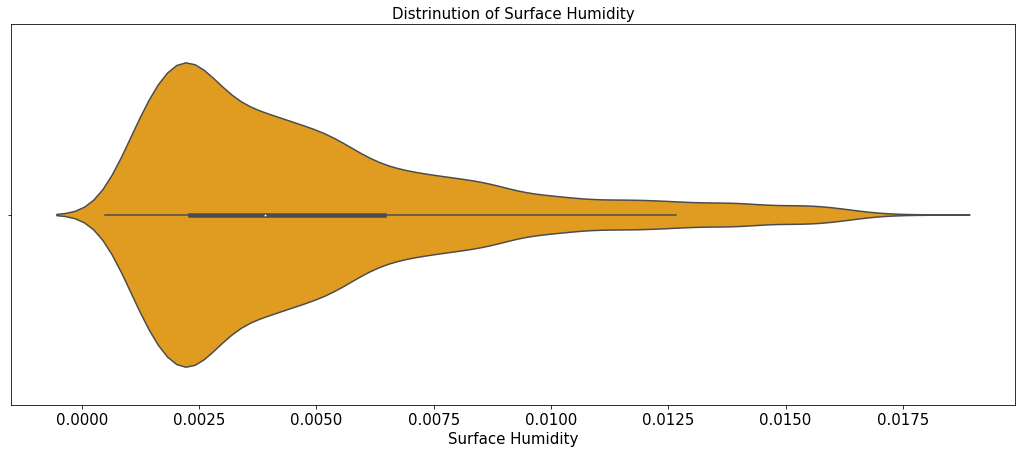

In [33]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "surface humidity", data = df, color = "orange")
plt.title("Distrinution of Surface Humidity", size = 15)
plt.xlabel("Surface Humidity", size = 15)
plt.xticks(size = 15)
plt.show()

### Distribution of Radiance Intensity

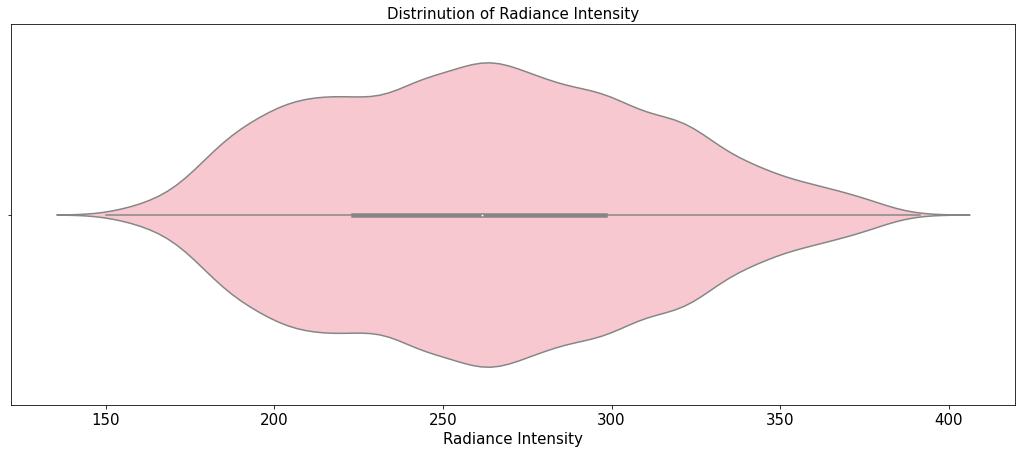

In [34]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "radiance intensity", data = df, color = "pink")
plt.title("Distrinution of Radiance Intensity", size = 15)
plt.xlabel("Radiance Intensity", size = 15)
plt.xticks(size = 15)
plt.show()

### Distribution of Surface Incomming Short Wave Flux

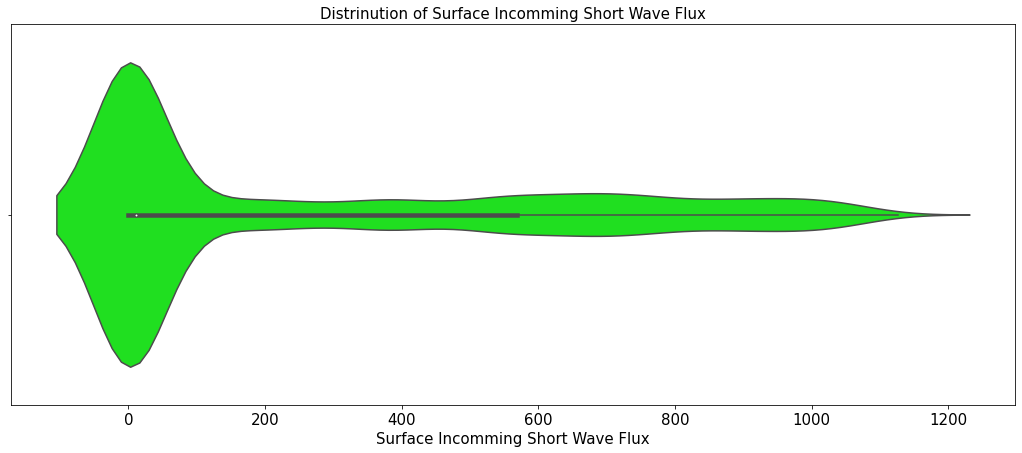

In [35]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "surface incomming short wave flux", data = df, color = "lime")
plt.title("Distrinution of Surface Incomming Short Wave Flux", size = 15)
plt.xlabel("Surface Incomming Short Wave Flux", size = 15)
plt.xticks(size = 15)
plt.show()

### Distribution of Ozone

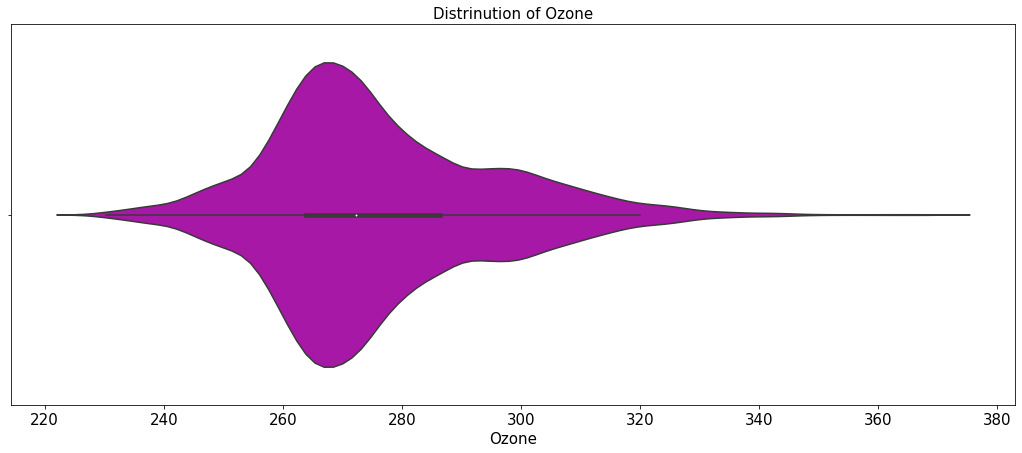

In [36]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "total column ozone", data = df, color = "m")
plt.title("Distrinution of Ozone", size = 15)
plt.xlabel("Ozone", size = 15)
plt.xticks(size = 15)
plt.show()

### Distribution of Total Precipitateable Water Vapours

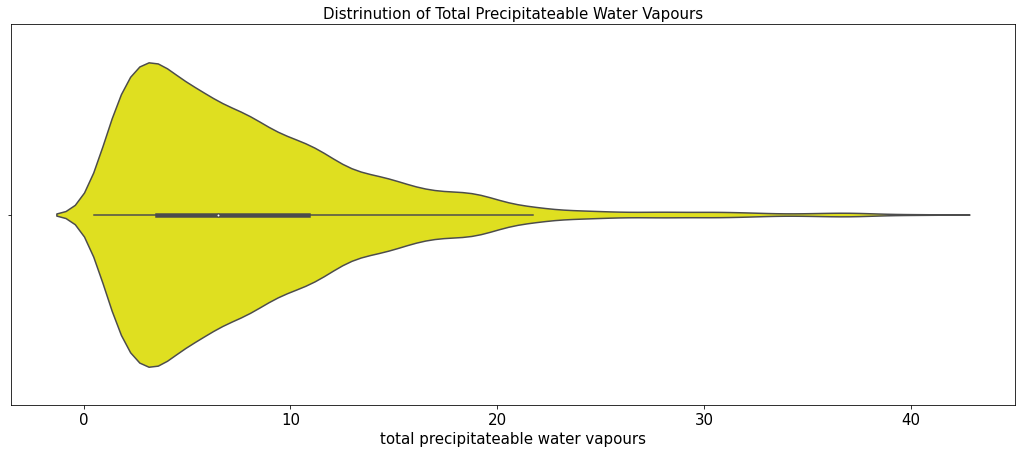

In [37]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "total precipitateable water vapours", data = df, color = "yellow")
plt.title("Distrinution of Total Precipitateable Water Vapours", size = 15)
plt.xlabel("total precipitateable water vapours", size = 15)
plt.xticks(size = 15)
plt.show()

### Distribution of Wind Speed

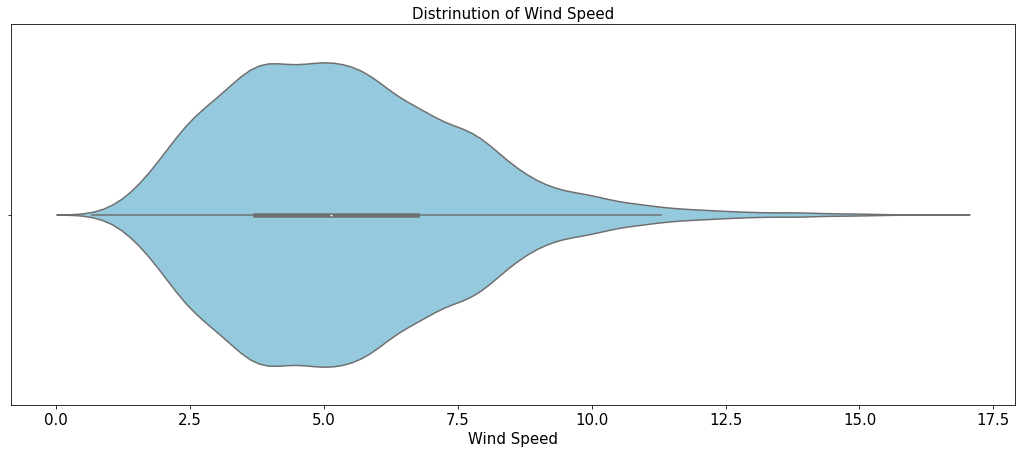

In [38]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "wind speed", data = df, color = "skyblue")
plt.title("Distrinution of Wind Speed", size = 15)
plt.xlabel("Wind Speed", size = 15)
plt.xticks(size = 15)
plt.show()

# Air Temperature Prediction with SVM

In [48]:
# Festures
X = df[["surface humidity", "radiance intensity", "surface incomming short wave flux", "total column ozone", "total precipitateable water vapours",  "wind speed"]]

# Target
y = df["air temperature"]

In [49]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Instantiate Linear SVM Object
svm = SVR()

# Instantiate the GridSearchCV object and run the search
parameter = {'kernel':["linear", "poly"]}

searcher = GridSearchCV(svm, parameter)

searcher.fit(X_train_std, y_train)

# Report the best parameter and the corresponding score
print("Best CV params", searcher.best_params_, "\n")

print("Best CV accuracy", searcher.best_score_)

Best CV params {'kernel': 'linear'} 

Best CV accuracy 0.8432075171042287


In [50]:
pred_s1 = searcher.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_s1})[:5]

,Actual,Predicted
4058,-6.792426,-2.732267
11646,12.119471,10.376197
12411,0.780634,-2.618598
5556,11.831202,14.236881
2348,-0.552649,-0.362603


In [51]:
rmse = MSE(y_test, pred_s1)**(0.5)
print("Root Mean Squared Error =", rmse)

Root Mean Squared Error = 3.6217714677971182


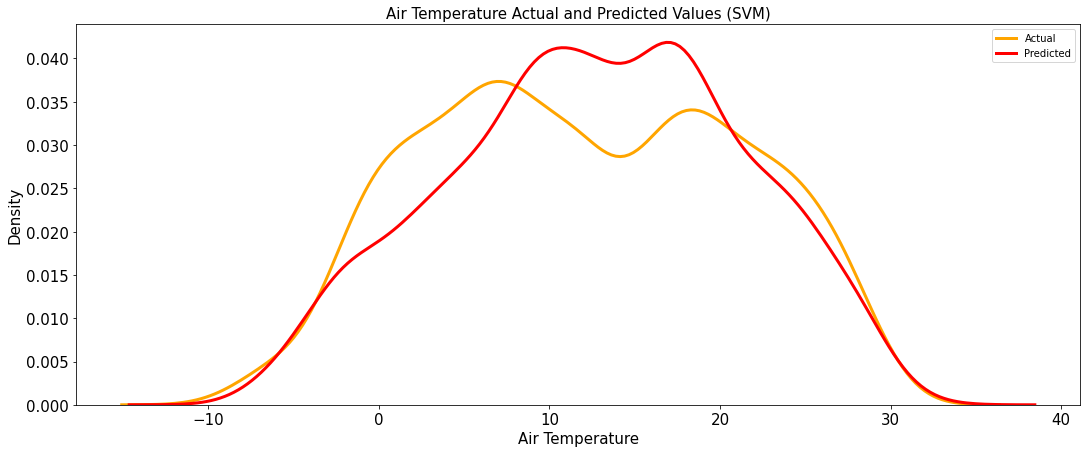

In [64]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_s1, label = "Predicted", linewidth = 3, color = "red")
plt.title("Air Temperature Actual and Predicted Values (SVM)", size = 15)
plt.xlabel("Air Temperature", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Air Temperature Prediction with ANN

In [54]:
# Festures
X = df[["surface humidity", "radiance intensity", "surface incomming short wave flux", "total column ozone", "total precipitateable water vapours",  "wind speed"]]

# Target
y = df["air temperature"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_std, y_train, batch_size = 10, epochs = 100)

pred_a1 = model.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_a1.flatten()})[:5]

Epoch 1/100
923/923 [==============================] - 1s 2ms/step - loss: 34.7337
Epoch 2/100
923/923 [==============================] - 1s 2ms/step - loss: 8.6379
Epoch 3/100
923/923 [==============================] - 2s 2ms/step - loss: 8.1509
Epoch 4/100
923/923 [==============================] - 1s 2ms/step - loss: 7.8745
Epoch 5/100
923/923 [==============================] - 2s 2ms/step - loss: 7.7581
Epoch 6/100
923/923 [==============================] - 2s 2ms/step - loss: 7.5292
Epoch 7/100
923/923 [==============================] - 2s 2ms/step - loss: 7.4460
Epoch 8/100
923/923 [==============================] - 2s 2ms/step - loss: 7.2837
Epoch 9/100
923/923 [==============================] - 1s 2ms/step - loss: 7.2314
Epoch 10/100
923/923 [==============================] - 1s 2ms/step - loss: 7.1019
Epoch 11/100
923/923 [==============================] - 1s 2ms/step - loss: 7.0057
Epoch 12/100
923/923 [==============================] - 1s 2ms/step - loss: 6.9554
Epoch 13/100

,Actual,Predicted
138,25.946894,24.447910
9376,20.281488,19.050537
5175,7.045618,8.829660
4228,1.015039,5.564773
5936,11.333673,11.976492


In [57]:
rmse = MSE(y_test, pred_a1)**(0.5)
print("Root Mean Squared Error =", rmse.round(2))

Root Mean Squared Error = 2.29


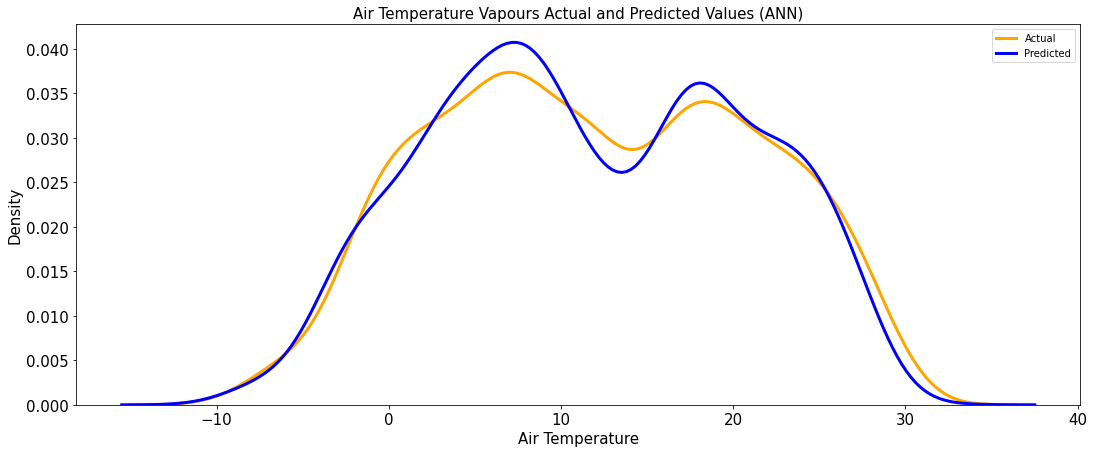

In [63]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a1.flatten(), label = "Predicted", linewidth = 3, color = "blue")
plt.title("Air Temperature Vapours Actual and Predicted Values (ANN)", size = 15)
plt.xlabel("Air Temperature", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Air Temperature Prediction Comparison (SVM & ANN)

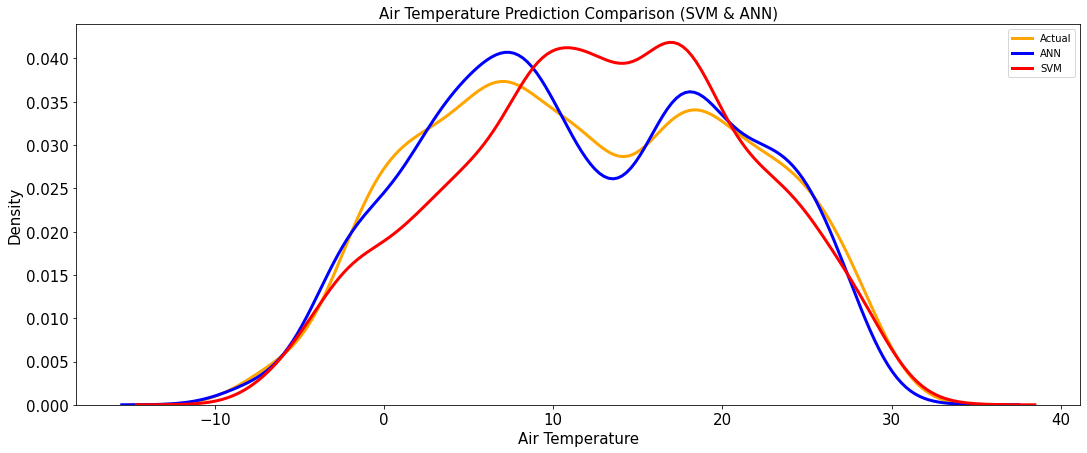

In [62]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a1.flatten(), label = "ANN", linewidth = 3, color = "blue")
sns.kdeplot(pred_s1.flatten(), label = "SVM", linewidth = 3, color = "red")
plt.title("Air Temperature Prediction Comparison (SVM & ANN)", size = 15)
plt.xlabel("Air Temperature", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Surface Humidity Prediction with SVM

In [69]:
# Festures
X = df[["air temperature", "radiance intensity", "surface incomming short wave flux", "total column ozone", "total precipitateable water vapours",  "wind speed"]]

# Target
y = df["surface humidity"]

In [70]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Instantiate Linear SVM Object
svm = SVR()

# Instantiate the GridSearchCV object and run the search
parameter = {'kernel':["linear", "poly"]}

searcher = GridSearchCV(svm, parameter)

searcher.fit(X_train_std, y_train)

# Report the best parameter and the corresponding score
print("Best CV params", searcher.best_params_, "\n")

print("Best CV accuracy", searcher.best_score_)

Best CV params {'kernel': 'linear'} 

Best CV accuracy -1.4612078877699208


In [71]:
pred_s2 = searcher.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_s2})[:5]

,Actual,Predicted
4058,0.001789,0.009099
11646,0.001990,0.009099
12411,0.001217,0.009099
5556,0.005413,0.009099
2348,0.003840,0.009099


In [72]:
rmse = MSE(y_test, pred_s2)**(0.5)
print("Root Mean Squared Error =", rmse)

Root Mean Squared Error = 0.005429770633444614


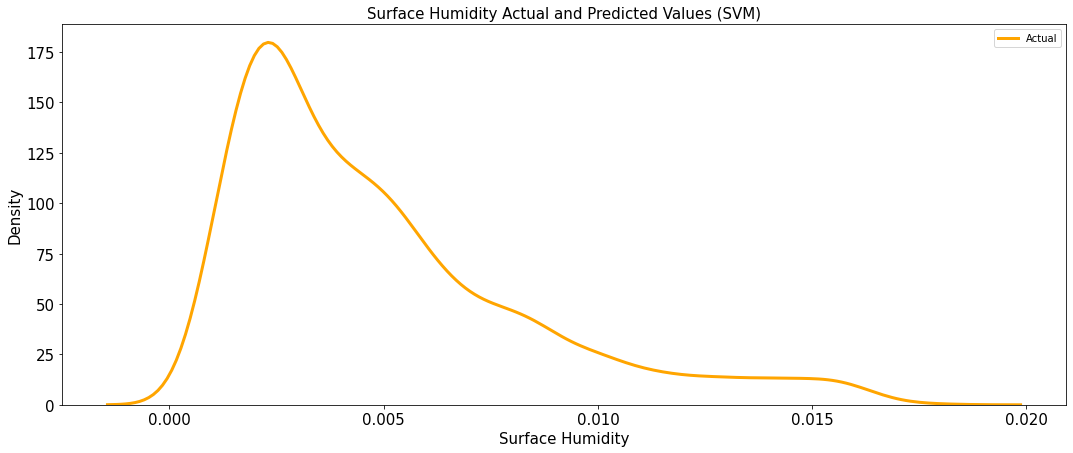

In [73]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_s2, label = "Predicted", linewidth = 3, color = "red")
plt.title("Surface Humidity Actual and Predicted Values (SVM)", size = 15)
plt.xlabel("Surface Humidity", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

**There is no variance in predicted values through SVM so Actual / Predicted graph is not made**

# Surface Humidity Prediction with ANN

In [ ]:
# Festures
X = df[["air temperature", "radiance intensity", "surface incomming short wave flux", "total column ozone", "total precipitateable water vapours",  "wind speed"]]

# Target
y = df["surface humidity"]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_std, y_train, batch_size = 10, epochs = 100)

pred_a2 = model.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_a2.flatten()})[:5]

Epoch 1/100
923/923 [==============================] - 2s 2ms/step - loss: 9.8824e-04
Epoch 2/100
923/923 [==============================] - 2s 2ms/step - loss: 7.6589e-05
Epoch 3/100
923/923 [==============================] - 1s 2ms/step - loss: 4.0041e-05
Epoch 4/100
923/923 [==============================] - 2s 2ms/step - loss: 2.4716e-05
Epoch 5/100
923/923 [==============================] - 2s 2ms/step - loss: 1.7175e-05
Epoch 6/100
923/923 [==============================] - 2s 2ms/step - loss: 1.3236e-05
Epoch 7/100
923/923 [==============================] - 2s 2ms/step - loss: 9.0006e-06
Epoch 8/100
923/923 [==============================] - 2s 2ms/step - loss: 6.2966e-06
Epoch 9/100
923/923 [==============================] - 2s 2ms/step - loss: 4.3169e-06
Epoch 10/100
923/923 [==============================] - 2s 2ms/step - loss: 3.1136e-06
Epoch 11/100
923/923 [==============================] - 2s 2ms/step - loss: 2.6875e-06
Epoch 12/100
923/923 [==============================

,Actual,Predicted
8695,0.005850,0.006681
6946,0.003398,0.004154
13087,0.000719,0.001044
5722,0.007149,0.006108
2813,0.002746,0.002794


In [76]:
rmse = MSE(y_test, pred_a2)**(0.5)
print("Root Mean Squared Error =", rmse.round(5))

Root Mean Squared Error = 0.00091


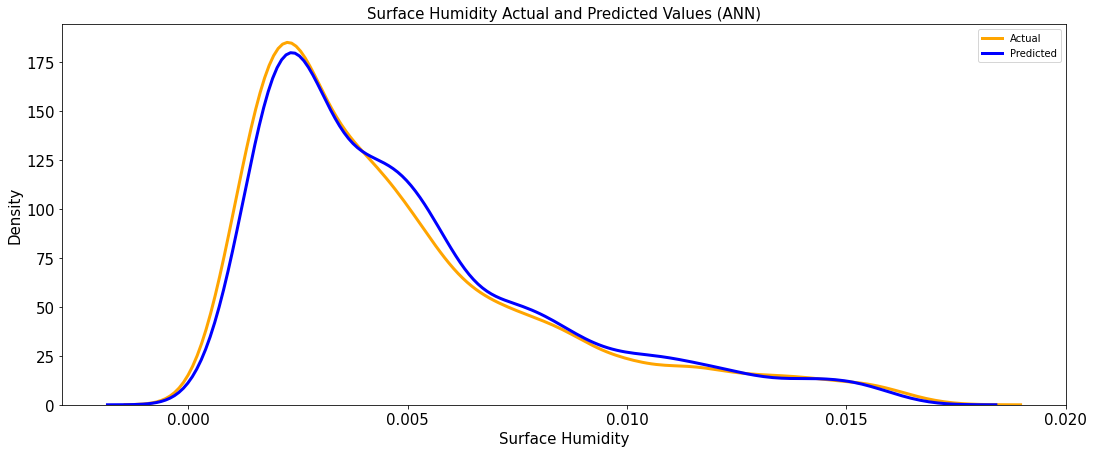

In [77]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a2.flatten(), label = "Predicted", linewidth = 3, color = "blue")
plt.title("Surface Humidity Actual and Predicted Values (ANN)", size = 15)
plt.xlabel("Surface Humidity", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Radiance Intensity Prediction with SVM

In [3]:
# Festures
X = df[["surface humidity", "air temperature", "surface incomming short wave flux", "total column ozone", "total precipitateable water vapours",  "wind speed"]]

# Target
y = df["radiance intensity"]

In [5]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Instantiate Linear SVM Object
svm = SVR()

# Instantiate the GridSearchCV object and run the search
parameter = {'kernel':["linear", "poly"]}

searcher = GridSearchCV(svm, parameter)

searcher.fit(X_train_std, y_train)

# Report the best parameter and the corresponding score
print("Best CV params", searcher.best_params_, "\n")

print("Best CV accuracy", searcher.best_score_)

Best CV params {'kernel': 'linear'} 

Best CV accuracy 0.9289001619205237


In [6]:
pred_s3 = searcher.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_s3})[:5]

,Actual,Predicted
4058,189.641861,177.705916
11646,232.179001,242.808734
12411,178.912582,193.120926
5556,292.888306,279.301215
2348,206.002441,209.243730


In [7]:
rmse = MSE(y_test, pred_s3)**(0.5)
print("Root Mean Squared Error =", rmse)

Root Mean Squared Error = 13.095468665822946


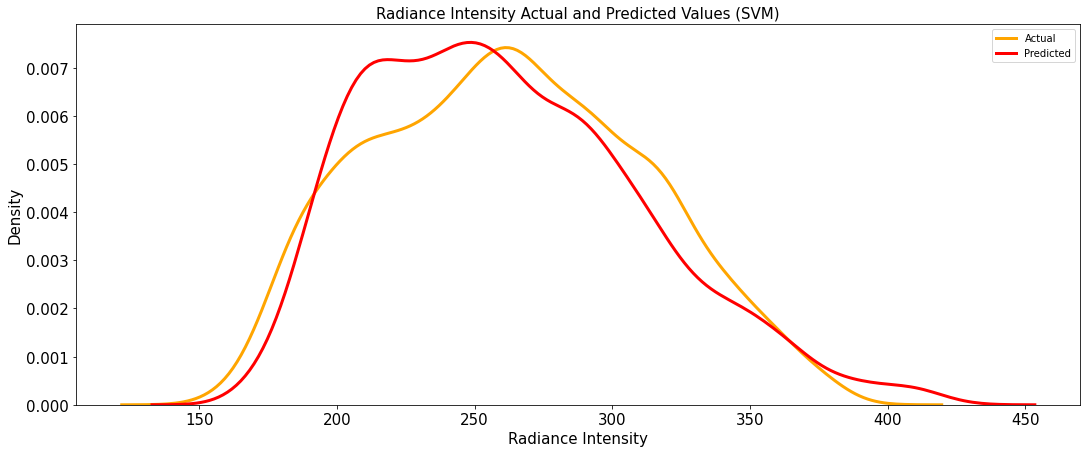

In [8]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_s3, label = "Predicted", linewidth = 3, color = "red")
plt.title("Radiance Intensity Actual and Predicted Values (SVM)", size = 15)
plt.xlabel("Radiance Intensity", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Radiance Intensity Prediction with ANN

In [9]:
# Festures
X = df[["air temperature", "surface humidity", "surface incomming short wave flux", "total column ozone", "total precipitateable water vapours",  "wind speed"]]

# Target
y = df["radiance intensity"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_std, y_train, batch_size = 10, epochs = 100)

pred_a3 = model.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_a3.flatten()})[:5]

Epoch 1/100
923/923 [==============================] - 1s 1ms/step - loss: 10179.6670A: 0s - loss: 15
Epoch 2/100
923/923 [==============================] - 1s 1ms/step - loss: 356.1714
Epoch 3/100
923/923 [==============================] - 1s 1ms/step - loss: 133.9543A: 0s - loss: 135.43
Epoch 4/100
923/923 [==============================] - 1s 1ms/step - loss: 94.9849
Epoch 5/100
923/923 [==============================] - 1s 1ms/step - loss: 84.3316
Epoch 6/100
923/923 [==============================] - 1s 1ms/step - loss: 80.1838
Epoch 7/100
923/923 [==============================] - 1s 1ms/step - loss: 78.5742
Epoch 8/100
923/923 [==============================] - 1s 1ms/step - loss: 76.3567
Epoch 9/100
923/923 [==============================] - 1s 1ms/step - loss: 75.2292
Epoch 10/100
923/923 [==============================] - 1s 1ms/step - loss: 75.0207
Epoch 11/100
923/923 [==============================] - 1s 1ms/step - loss: 73.3256
Epoch 12/100
923/923 [======================

,Actual,Predicted
9006,370.200531,362.291534
9725,277.772125,278.475464
10484,256.064331,253.509308
12162,248.033600,247.445297
1431,290.981354,294.056824


In [11]:
rmse = MSE(y_test, pred_a3)**(0.5)
print("Root Mean Squared Error =", rmse.round(2))

Root Mean Squared Error = 8.08


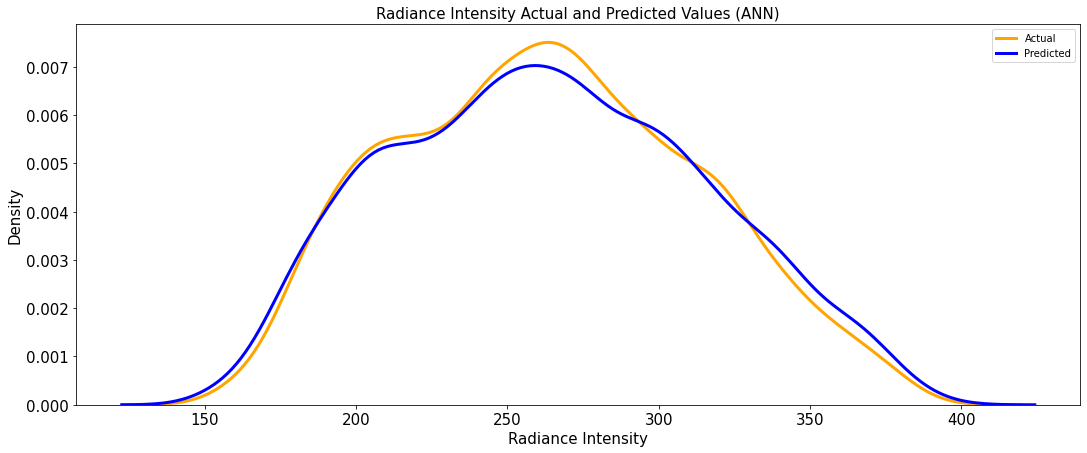

In [12]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a3.flatten(), label = "Predicted", linewidth = 3, color = "blue")
plt.title("Radiance Intensity Actual and Predicted Values (ANN)", size = 15)
plt.xlabel("Radiance Intensity", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Radiance Intensity Prediction Comparison (SVM & ANN)

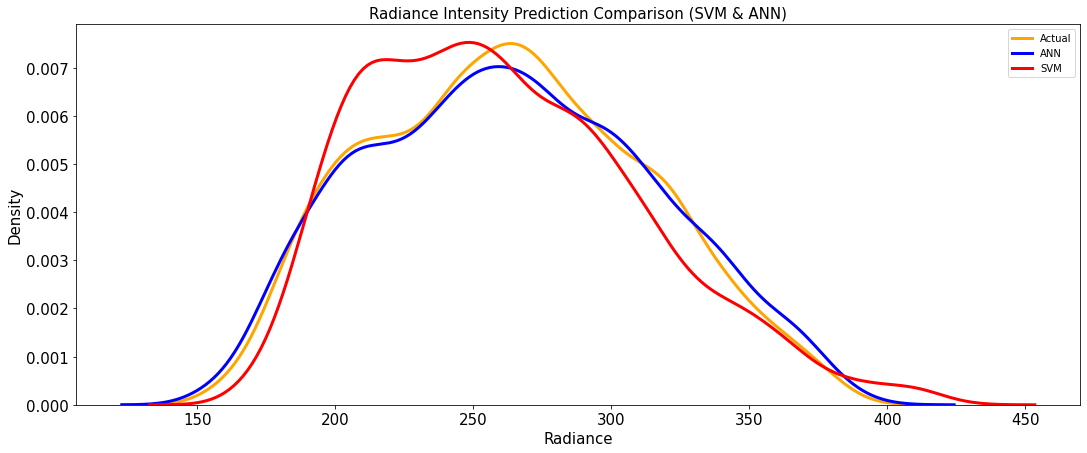

In [13]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a3.flatten(), label = "ANN", linewidth = 3, color = "blue")
sns.kdeplot(pred_s3.flatten(), label = "SVM", linewidth = 3, color = "red")
plt.title("Radiance Intensity Prediction Comparison (SVM & ANN)", size = 15)
plt.xlabel("Radiance Intensity", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Surface Incomming Short Wave Flux Prediction with SVM

In [14]:
# Festures
X = df[["surface humidity", "air temperature", "radiance intensity", "total column ozone", "total precipitateable water vapours",  "wind speed"]]

# Target
y = df["surface incomming short wave flux"]

In [15]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Instantiate Linear SVM Object
svm = SVR()

# Instantiate the GridSearchCV object and run the search
parameter = {'kernel':["linear", "poly"]}

searcher = GridSearchCV(svm, parameter)

searcher.fit(X_train_std, y_train)

# Report the best parameter and the corresponding score
print("Best CV params", searcher.best_params_, "\n")

print("Best CV accuracy", searcher.best_score_)

Best CV params {'kernel': 'linear'} 

Best CV accuracy 0.15011350792361933


In [16]:
pred_s4 = searcher.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_s4})[:5]

,Actual,Predicted
4058,27.71875,-7.567816
11646,658.50000,197.564156
12411,193.31250,22.702724
5556,177.25000,270.039575
2348,0.00000,47.349852


In [17]:
rmse = MSE(y_test, pred_s4)**(0.5)
print("Root Mean Squared Error =", rmse)

Root Mean Squared Error = 323.23540165608495


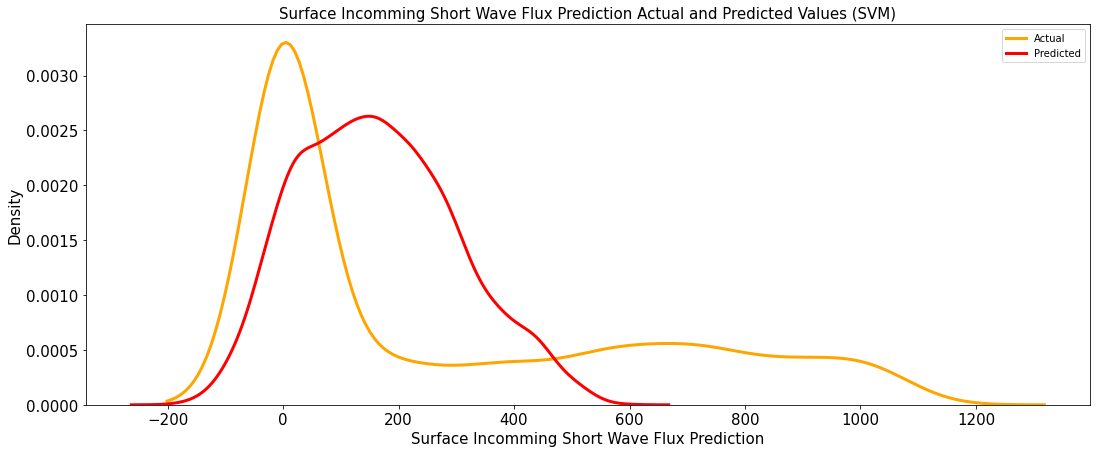

In [18]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_s4, label = "Predicted", linewidth = 3, color = "red")
plt.title("Surface Incomming Short Wave Flux Actual and Predicted Values (SVM)", size = 15)
plt.xlabel("Surface Incomming Short Wave Flux", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Surface Incomming Short Wave Flux Prediction with ANN

In [19]:
# Festures
X = df[["air temperature", "surface humidity", "radiance intensity", "total column ozone", "total precipitateable water vapours",  "wind speed"]]

# Target
y = df["surface incomming short wave flux"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_std, y_train, batch_size = 10, epochs = 100)

pred_a4 = model.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_a4.flatten()})[:5]

Epoch 1/100
923/923 [==============================] - 1s 1ms/step - loss: 109220.7031
Epoch 2/100
923/923 [==============================] - 1s 1ms/step - loss: 85127.5938
Epoch 3/100
923/923 [==============================] - 1s 1ms/step - loss: 82064.9062
Epoch 4/100
923/923 [==============================] - 1s 1ms/step - loss: 79970.0703
Epoch 5/100
923/923 [==============================] - 1s 1ms/step - loss: 78298.3516
Epoch 6/100
923/923 [==============================] - 1s 1ms/step - loss: 76580.4844
Epoch 7/100
923/923 [==============================] - 1s 1ms/step - loss: 75151.6484
Epoch 8/100
923/923 [==============================] - 1s 1ms/step - loss: 73520.7031
Epoch 9/100
923/923 [==============================] - 1s 1ms/step - loss: 72212.0547
Epoch 10/100
923/923 [==============================] - 1s 1ms/step - loss: 71356.3047
Epoch 11/100
923/923 [==============================] - 1s 1ms/step - loss: 70440.7344
Epoch 12/100
923/923 [=============================

,Actual,Predicted
950,0.00,452.161346
6030,988.25,488.864075
2341,0.00,519.086731
3139,0.00,41.557507
11942,0.00,102.947472


In [21]:
rmse = MSE(y_test, pred_a4)**(0.5)
print("Root Mean Squared Error =", rmse.round(2))

Root Mean Squared Error = 251.8


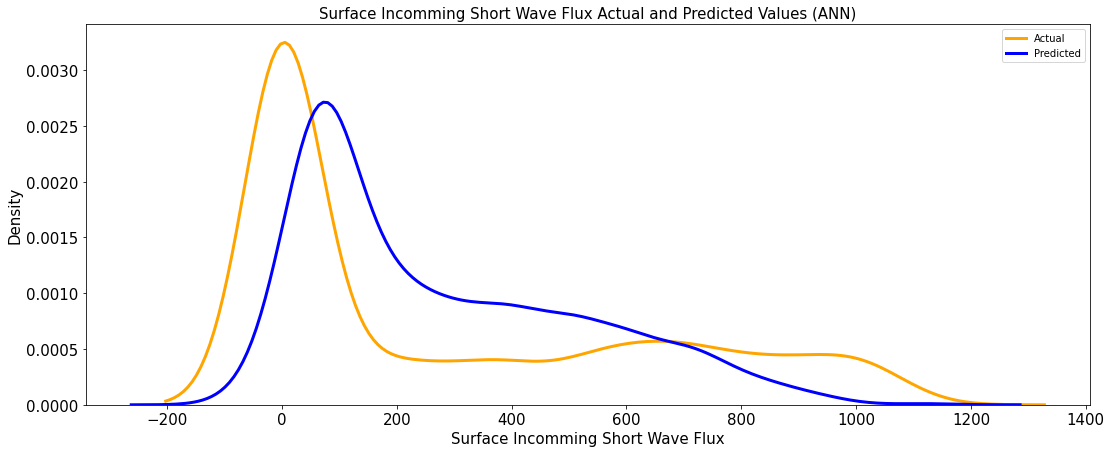

In [22]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a4.flatten(), label = "Predicted", linewidth = 3, color = "blue")
plt.title("Surface Incomming Short Wave Flux Actual and Predicted Values (ANN)", size = 15)
plt.xlabel("Surface Incomming Short Wave Flux", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Surface Incomming Short Wave Flux Prediction Comparison (SVM & ANN)

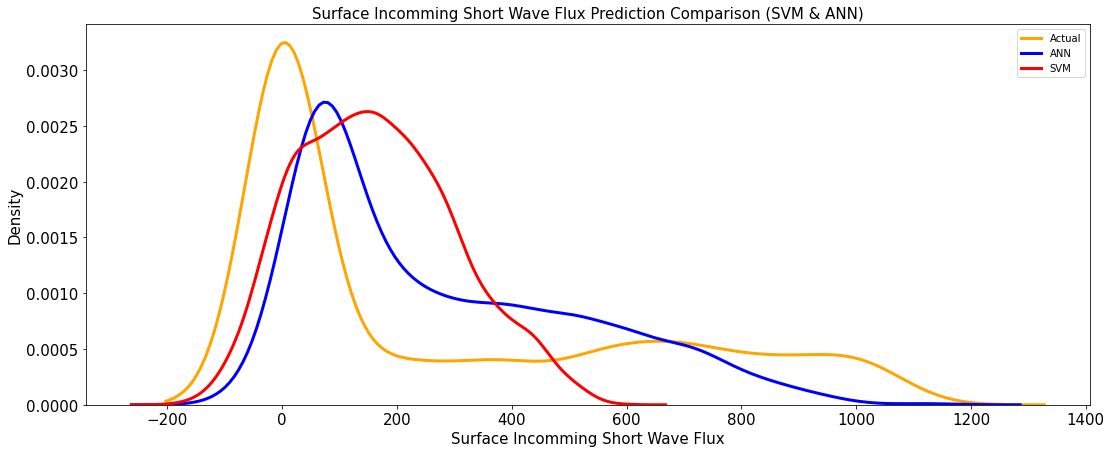

In [23]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a4.flatten(), label = "ANN", linewidth = 3, color = "blue")
sns.kdeplot(pred_s4.flatten(), label = "SVM", linewidth = 3, color = "red")
plt.title("Surface Incomming Short Wave Flux Prediction Comparison (SVM & ANN)", size = 15)
plt.xlabel("Surface Incomming Short Wave Flux", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Ozone Prediction with SVM

In [8]:
# Festures
X = df[["air temperature", "surface humidity", "radiance intensity", "surface incomming short wave flux", "total precipitateable water vapours",  "wind speed"]]

# Target
y = df["total column ozone"]

In [9]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Instantiate Linear SVM Object
svm = SVR()

# Instantiate the GridSearchCV object and run the search
parameter = {'kernel':["linear", "poly"]}

searcher = GridSearchCV(svm, parameter)

searcher.fit(X_train_std, y_train)

# Report the best parameter and the corresponding score
print("Best CV params", searcher.best_params_, "\n")

print("Best CV accuracy", searcher.best_score_)

Best CV params {'kernel': 'linear'} 

Best CV accuracy 0.2751968965383206


In [10]:
pred_s5 = searcher.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_s5})[:5]

,Actual,Predicted
4058,311.280609,293.479892
11646,257.083588,270.012607
12411,301.125732,275.633126
5556,315.893311,281.335975
2348,296.226837,285.841585


In [11]:
rmse = MSE(y_test, pred_s5)**(0.5)
print("Root Mean Squared Error =", rmse)

Root Mean Squared Error = 16.493382087625104


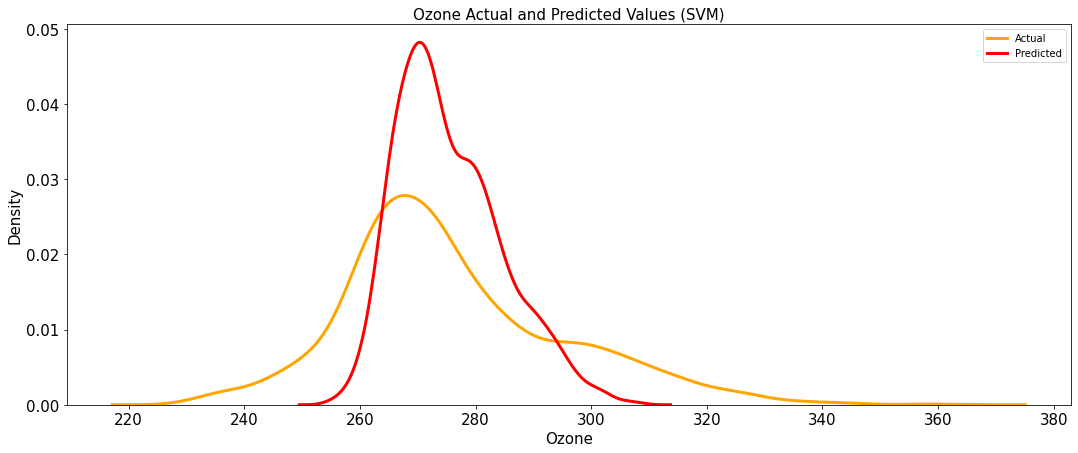

In [12]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_s5, label = "Predicted", linewidth = 3, color = "red")
plt.title("Ozone Actual and Predicted Values (SVM)", size = 15)
plt.xlabel("Ozone", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Ozone Prediction with ANN

In [3]:
# Festures
X = df[["air temperature", "surface humidity", "radiance intensity", "surface incomming short wave flux", "total precipitateable water vapours",  "wind speed"]]

# Target
y = df["total column ozone"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_std, y_train, batch_size = 10, epochs = 100)

pred_a5 = model.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_a5.flatten()})[:5]

Epoch 1/100
923/923 [==============================] - 1s 1ms/step - loss: 12978.6934
Epoch 2/100
923/923 [==============================] - 1s 1ms/step - loss: 497.9547
Epoch 3/100
923/923 [==============================] - 1s 1ms/step - loss: 313.5533
Epoch 4/100
923/923 [==============================] - 1s 1ms/step - loss: 271.7716
Epoch 5/100
923/923 [==============================] - 1s 1ms/step - loss: 256.8939
Epoch 6/100
923/923 [==============================] - 1s 1ms/step - loss: 251.5452
Epoch 7/100
923/923 [==============================] - 1s 1ms/step - loss: 245.6870
Epoch 8/100
923/923 [==============================] - 1s 1ms/step - loss: 240.9681
Epoch 9/100
923/923 [==============================] - 1s 1ms/step - loss: 234.8147
Epoch 10/100
923/923 [==============================] - 1s 1ms/step - loss: 231.8242
Epoch 11/100
923/923 [==============================] - 1s 1ms/step - loss: 229.6903
Epoch 12/100
923/923 [==============================] - 1s 1ms/step - lo

,Actual,Predicted
9830,263.521271,271.949066
7997,270.736938,262.167297
10099,265.155609,266.128540
5019,265.448334,261.367432
10740,247.276703,259.237732


In [5]:
rmse = MSE(y_test, pred_a5)**(0.5)
print("Root Mean Squared Error =", rmse.round(2))

Root Mean Squared Error = 13.98


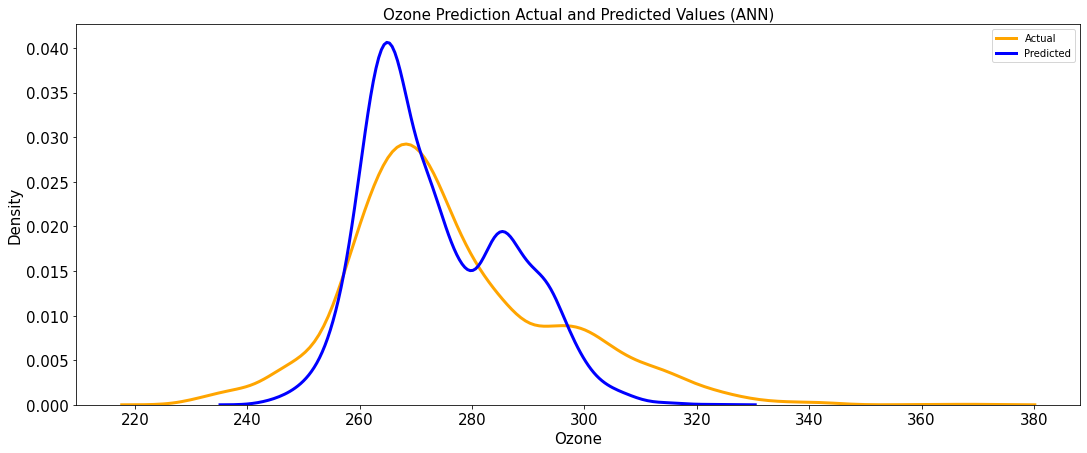

In [6]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a5.flatten(), label = "Predicted", linewidth = 3, color = "blue")
plt.title("Ozone Prediction Actual and Predicted Values (ANN)", size = 15)
plt.xlabel("Ozone", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Ozone Prediction Comparison (SVM & ANN)

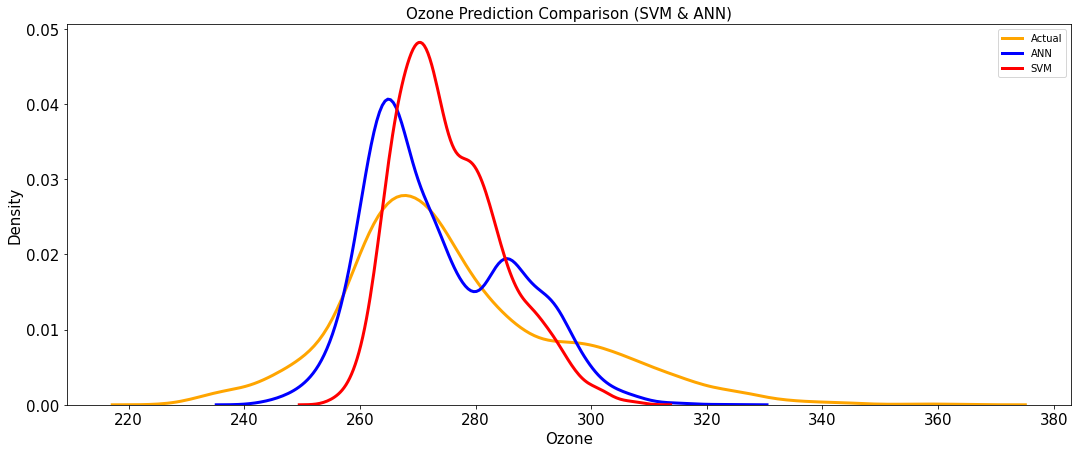

In [13]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a5.flatten(), label = "ANN", linewidth = 3, color = "blue")
sns.kdeplot(pred_s5.flatten(), label = "SVM", linewidth = 3, color = "red")
plt.title("Ozone Prediction Comparison (SVM & ANN)", size = 15)
plt.xlabel("Ozone", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Total Precipitateable Water Vapours Prediction with SVM

In [10]:
# Festures
X = df[["surface humidity", "air temperature", "radiance intensity", "surface incomming short wave flux", "total column ozone",  "wind speed"]]

# Target
y = df["total precipitateable water vapours"]

In [11]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Instantiate Linear SVM Object
svm = SVR()

# Instantiate the GridSearchCV object and run the search
parameter = {'kernel':["linear", "poly"]}

searcher = GridSearchCV(svm, parameter)

searcher.fit(X_train_std, y_train)

# Report the best parameter and the corresponding score
print("Best CV params", searcher.best_params_, "\n")

print("Best CV accuracy", searcher.best_score_)

Best CV params {'kernel': 'poly'} 

Best CV accuracy 0.8348099739823118


In [12]:
pred_s6 = searcher.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_s6})[:5]

,Actual,Predicted
4058,2.317266,2.124072
11646,6.417947,5.062353
12411,1.085830,-0.731446
5556,11.433157,7.804461
2348,4.319731,5.509454


In [13]:
rmse = MSE(y_test, pred_s6)**(0.5)
print("Root Mean Squared Error =", rmse)

Root Mean Squared Error = 2.439706567367653


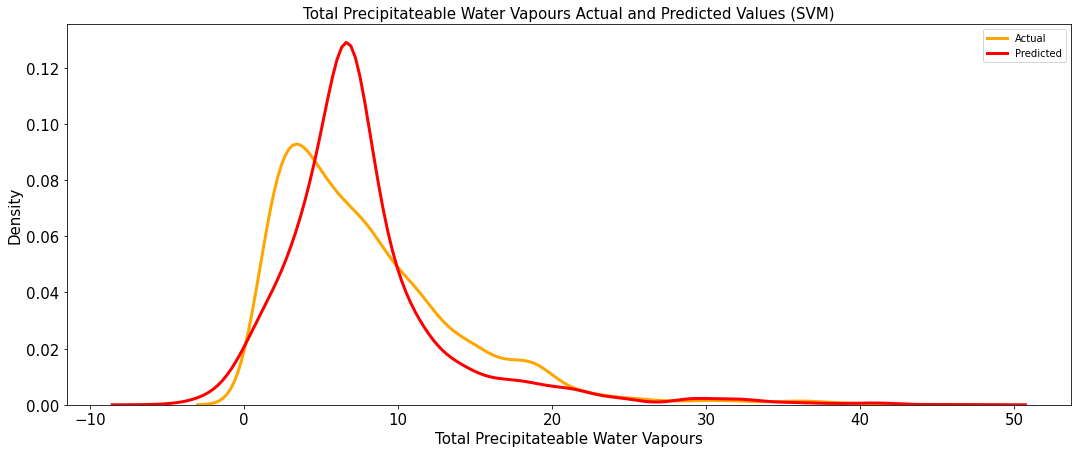

In [14]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_s6, label = "Predicted", linewidth = 3, color = "red")
plt.title("Total Precipitateable Water Vapours Actual and Predicted Values (SVM)", size = 15)
plt.xlabel("Total Precipitateable Water Vapours", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Total Precipitateable Water Vapours Prediction with ANN

In [3]:
# Festures
X = df[["air temperature", "surface humidity", "radiance intensity", "surface incomming short wave flux", "total column ozone",  "wind speed"]]

# Target
y = df["total precipitateable water vapours"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_std, y_train, batch_size = 10, epochs = 100)

pred_b6 = model.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_b6.flatten()})[:5]

Epoch 1/100
923/923 [==============================] - 1s 1ms/step - loss: 12.0272
Epoch 2/100
923/923 [==============================] - 1s 1ms/step - loss: 3.8778
Epoch 3/100
923/923 [==============================] - 1s 1ms/step - loss: 3.4138
Epoch 4/100
923/923 [==============================] - 1s 1ms/step - loss: 3.1508A: 0s - loss: 3.
Epoch 5/100
923/923 [==============================] - 1s 1ms/step - loss: 2.9209
Epoch 6/100
923/923 [==============================] - 1s 2ms/step - loss: 2.8207
Epoch 7/100
923/923 [==============================] - 2s 2ms/step - loss: 2.7833
Epoch 8/100
923/923 [==============================] - 2s 2ms/step - loss: 2.6713
Epoch 9/100
923/923 [==============================] - 2s 2ms/step - loss: 2.6311
Epoch 10/100
923/923 [==============================] - 2s 2ms/step - loss: 2.6255
Epoch 11/100
923/923 [==============================] - 2s 2ms/step - loss: 2.6075
Epoch 12/100
923/923 [==============================] - 2s 2ms/step - loss: 2.5

,Actual,Predicted
12705,0.892221,0.635141
9529,13.810019,16.904930
11417,8.759286,7.896897
8927,28.922928,24.674480
5970,8.703814,6.363321


In [6]:
rmse = MSE(y_test, pred_b6)**(0.5)
print("Root Mean Squared Error =", rmse.round(3))

Root Mean Squared Error = 1.342


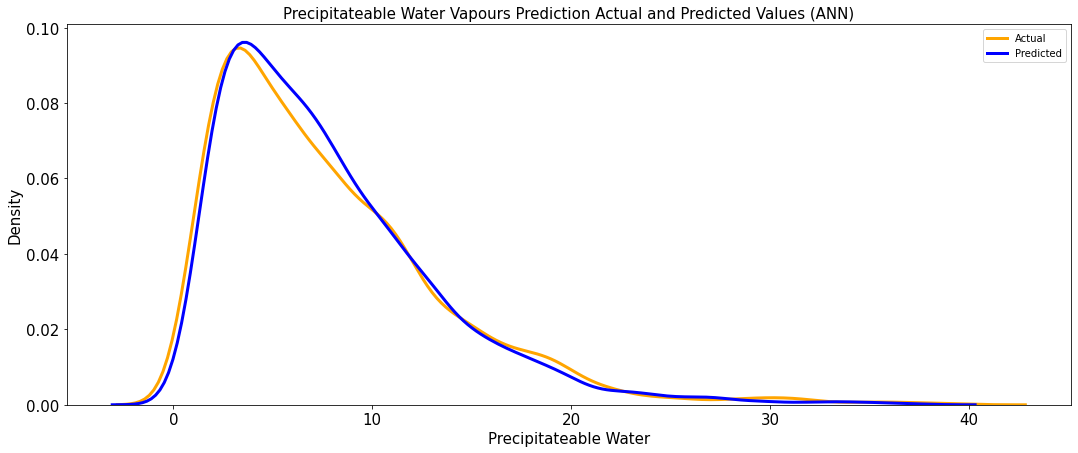

In [8]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_b6.flatten(), label = "Predicted", linewidth = 3, color = "blue")
plt.title("Precipitateable Water Vapours Prediction Actual and Predicted Values (ANN)", size = 15)
plt.xlabel("Precipitateable Water", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Precipitateable Water Vapours Prediction Comparison (SVM & ANN)

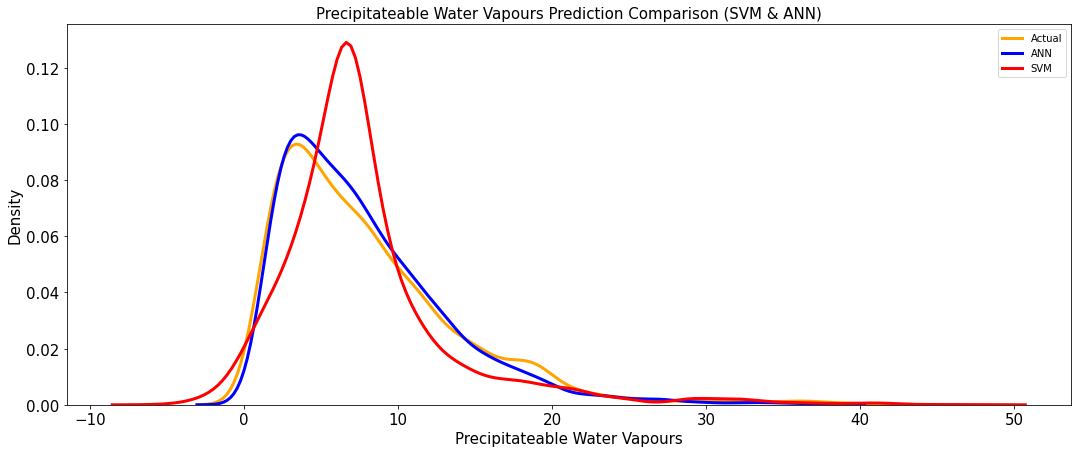

In [15]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_b6.flatten(), label = "ANN", linewidth = 3, color = "blue")
sns.kdeplot(pred_s6.flatten(), label = "SVM", linewidth = 3, color = "red")
plt.title("Precipitateable Water Vapours Prediction Comparison (SVM & ANN)", size = 15)
plt.xlabel("Precipitateable Water Vapours", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Wind Speed Prediction with SVM

In [16]:
# Festures
X = df[["surface humidity", "air temperature", "radiance intensity", "surface incomming short wave flux", "total column ozone",  "total precipitateable water vapours"]]

# Target
y = df["wind speed"]

In [17]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Instantiate Linear SVM Object
svm = SVR()

# Instantiate the GridSearchCV object and run the search
parameter = {'kernel':["linear", "poly"]}

searcher = GridSearchCV(svm, parameter)

searcher.fit(X_train_std, y_train)

# Report the best parameter and the corresponding score
print("Best CV params", searcher.best_params_, "\n")

print("Best CV accuracy", searcher.best_score_)

Best CV params {'kernel': 'poly'} 

Best CV accuracy 0.07812200696835622


In [18]:
pred_s7 = searcher.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_s7})[:5]

,Actual,Predicted
4058,5.626854,5.882937
11646,3.881111,4.834565
12411,1.829634,5.137756
5556,6.156575,5.263222
2348,7.449769,5.239574


In [19]:
rmse = MSE(y_test, pred_s7)**(0.5)
print("Root Mean Squared Error =", rmse)

Root Mean Squared Error = 2.1400231593415864


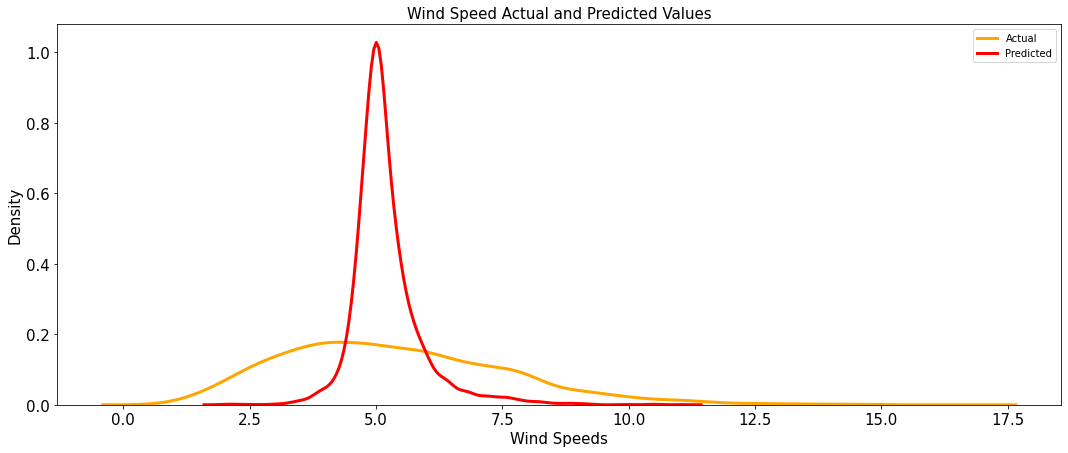

In [20]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_s7, label = "Predicted", linewidth = 3, color = "red")
plt.title("Wind Speed Actual and Predicted Values", size = 15)
plt.xlabel("Wind Speeds", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Wind Speed Prediction with ANN

In [21]:
# Festures
X = df[["air temperature", "surface humidity", "radiance intensity", "surface incomming short wave flux", "total column ozone",  "total precipitateable water vapours"]]

# Target
y = df["wind speed"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_std, y_train, batch_size = 10, epochs = 100)

pred_a7 = model.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_a7.flatten()})[:5]

Epoch 1/100
923/923 [==============================] - 2s 2ms/step - loss: 5.8874
Epoch 2/100
923/923 [==============================] - 2s 2ms/step - loss: 4.3027
Epoch 3/100
923/923 [==============================] - 1s 2ms/step - loss: 4.1978
Epoch 4/100
923/923 [==============================] - 2s 2ms/step - loss: 4.1149
Epoch 5/100
923/923 [==============================] - 2s 2ms/step - loss: 4.0457
Epoch 6/100
923/923 [==============================] - 2s 2ms/step - loss: 4.0025
Epoch 7/100
923/923 [==============================] - 2s 2ms/step - loss: 3.9697
Epoch 8/100
923/923 [==============================] - 2s 2ms/step - loss: 3.9603
Epoch 9/100
923/923 [==============================] - 2s 2ms/step - loss: 3.9048
Epoch 10/100
923/923 [==============================] - 2s 2ms/step - loss: 3.8899
Epoch 11/100
923/923 [==============================] - 2s 2ms/step - loss: 3.8750
Epoch 12/100
923/923 [==============================] - 2s 2ms/step - loss: 3.8483
Epoch 13/100


,Actual,Predicted
703,2.477319,3.936956
9104,3.510040,3.236256
6269,5.670206,8.319189
5653,7.855828,6.644226
8087,3.146800,5.900246


In [23]:
rmse = MSE(y_test, pred_a7)**(0.5)
print("Root Mean Squared Error =", rmse.round(3))

Root Mean Squared Error = 1.868


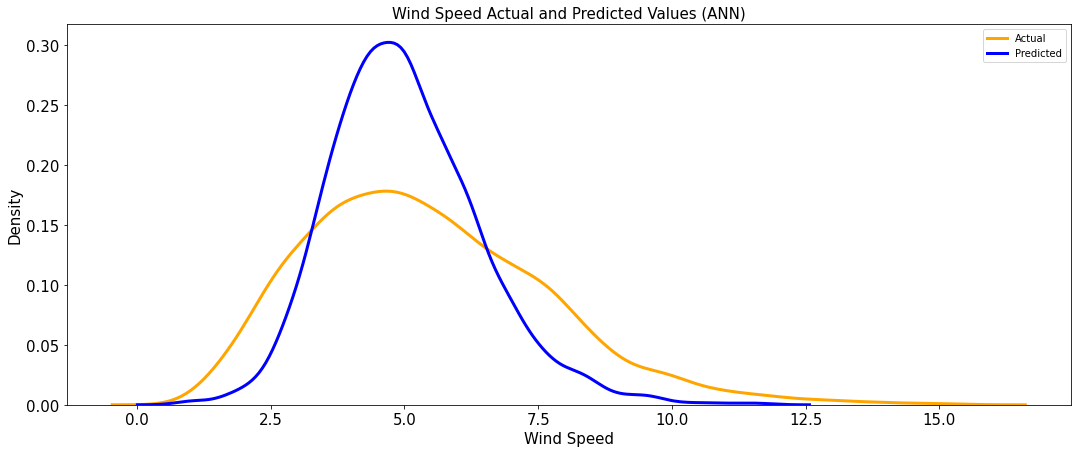

In [25]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a7.flatten(), label = "Predicted", linewidth = 3, color = "blue")
plt.title("Wind Speed Actual and Predicted Values (ANN)", size = 15)
plt.xlabel("Wind Speed", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Wind Speed Prediction Comparison (SVM & ANN)

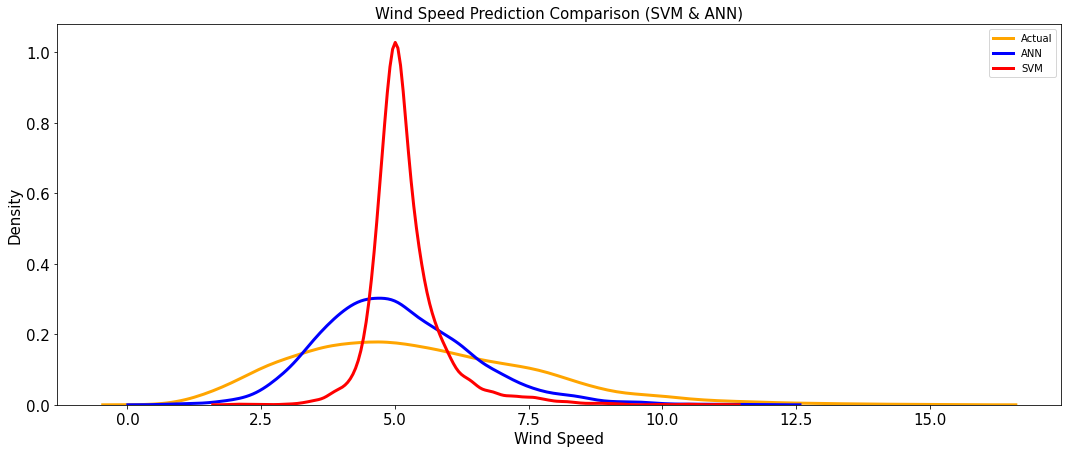

In [26]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a7.flatten(), label = "ANN", linewidth = 3, color = "blue")
sns.kdeplot(pred_s7.flatten(), label = "SVM", linewidth = 3, color = "red")
plt.title("Wind Speed Prediction Comparison (SVM & ANN)", size = 15)
plt.xlabel("Wind Speed", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()